# Plotting CAMS data

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

We'll start by opening up some CAMS $NO_{x}$ data and showing an overview of the dataset.

In [55]:
no2 = xr.open_dataarray("DATA/_grib2netcdf-atls01-70e05f9f8ba4e9d19932f1c45a7be8d8-dfLlbr.nc")
no2.latitude

<xarray.DataArray 'latitude' (latitude: 451)>
array([ 90. ,  89.6,  89.2, ..., -89.2, -89.6, -90. ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 90.0 89.6 89.2 88.8 ... -88.8 -89.2 -89.6 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

## Extracting and plotting point data
First, let's plot the $NO_{x}$ column over Kuala Lumpur.

Looks like $NO_{x}$ concentration was cyclical throughout July.

We can also plot the time series for multiple points at the same time. Here we plot $NO_{2}$ over ECMWF in Reading and EUMETSAT in Darmstadt.

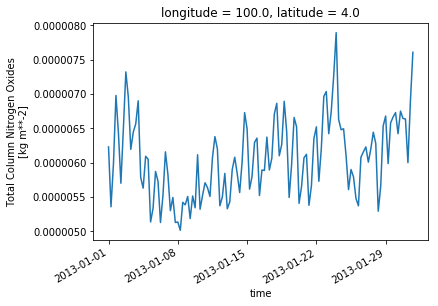

In [68]:
# We can also use isel to select by index, but we'll select for equality
#first_point = no2.isel(latitude=0, longitude=0)  # Select by position in arrays

%matplotlib inline
sele = no2.sel(latitude=4, longitude=100)
sele
sele.plot()

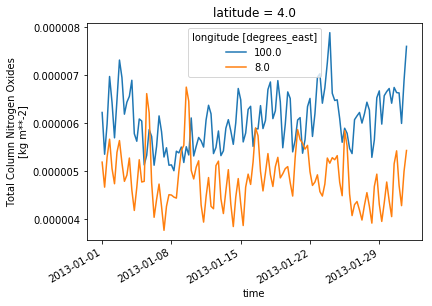

In [64]:
no2.sel(latitude=4, longitude=[100, 8], method="nearest").plot.line(x="time")

## Histograms
We can also plot a histogram of the entire dataset. In order to have sensible-looking bins, we plot the logarithm of the $NO_{2}$.

(array([6.2909100e+05, 3.7647160e+06, 4.0846990e+06, 2.5844223e+07,
        1.5625038e+07, 2.9948100e+05, 5.9540000e+04, 1.9651000e+04,
        4.6720000e+03, 4.8900000e+02]),
 array([-15.214214 , -14.459493 , -13.70477  , -12.950048 , -12.195326 ,
        -11.440604 , -10.685882 ,  -9.93116  ,  -9.176437 ,  -8.421716 ,
         -7.6669936], dtype=float32),
 <a list of 10 Patch objects>)

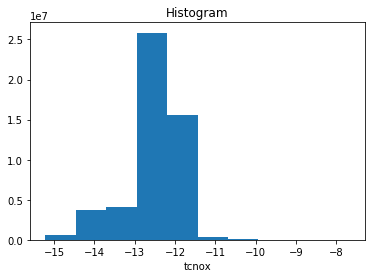

In [45]:
np.log(no2).plot()

## Maps
For a first glance, we plot a single time slice to see what we can see.

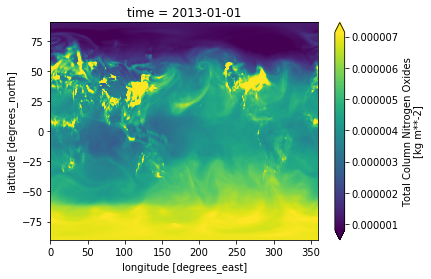

In [46]:
# Using geophysical units. `robust` disregards outliers for colour map creation.
no2.isel(time=0).plot(robust=True)

This is fine for getting a first glance, but we can reproject this onto a globe or any other coordinate system we like.

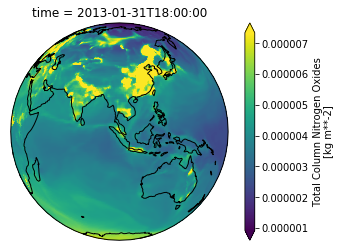

In [67]:
# Centered over Kuala Lumpur
ax = plt.axes(projection=ccrs.Orthographic(100.7, 2.9))
ax.coastlines()
# Use last time step in array.
p = no2.isel(time=-1).plot(transform=ccrs.PlateCarree(), robust=True)